# Train Delay Prediction

### CONTEXT


Train delays are a significant issue in the railway industry, causing inconvenience to passengers and financial losses for railway operators.
Delays can occur due to various reasons such as signal failures, technical issues, weather conditions, and staffing shortages.
Predicting whether a train journey will be "On Time" or "Delayed" can help railway operators manage resources more effectively and improve passenger satisfaction.

The dataset provided contains historical booking and journey data, including details such as purchase date and time, ticket type, departure and arrival stations, journey status, and reasons for delays.
By analyzing this data, we can build a predictive model to classify train journeys as "On Time" or "Delayed."

### PROBLEM STATEMENT


Using the provided dataset, the goal is to predict whether a train journey will be "On Time" or "Delayed." 


### CONTENT



The dataset includes the following features:

Transaction ID: Unique identifier for each transaction.

Date of Purchase: The date when the ticket was purchased.

Time of Purchase: The time when the ticket was purchased.

Purchase Type: The method of purchase (e.g., Online, Station).

Payment Method: The payment method used (e.g., Credit Card, Contactless).

Railcard: Type of railcard used (e.g., Adult, Disabled).

Ticket Class: Class of the ticket (e.g., Standard, First Class).

Ticket Type: Type of ticket (e.g., Advance, Off-Peak).

Price: The price of the ticket.

Departure Station: The station where the journey starts.

Arrival Destination: The station where the journey ends.

Date of Journey: The date of the train journey.

Departure Time: The scheduled departure time.

Arrival Time: The scheduled arrival time.

Actual Arrival Time: The actual arrival time.

Journey Status: The status of the journey (e.g., On Time, Delayed).

Reason for Delay: The reason for the delay, if any.

Refund Request: Whether a refund was requested.

#### Dataset Overview:


Rows: 31,653

Columns: 18

Target Variable: Journey Status (values: "On Time" or "Delayed")

# DATA EXPLORATION

#### Importing Libraries

In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set(style="whitegrid")

##### Loading dataset

In [3]:
df = pd.read_csv("railway.csv")

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   
 
   Payment Method Railcard Ticket Class Ticket Type  Price  \
 0    Contactless    Adult     Standard     Advance     43   
 1    Credit Card    Adult     Standard     Advance     23   
 2    Credit Card      NaN     Standard     Advance      3   
 3    Credit Card      NaN     Standard     Advance     13   
 4    Contactless      NaN     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey  \
 0      London Paddington  Liverpool Lime Street      2024-01-01   
 1     

In [4]:
df.shape

(31653, 18)

In [5]:
df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


#### Check for duplicate values

In [6]:
duplicate_count = df.duplicated().sum()

#### Check for missing values

In [7]:
missing_values = df.isnull().sum()

duplicate_count, missing_values

(0,
 Transaction ID             0
 Date of Purchase           0
 Time of Purchase           0
 Purchase Type              0
 Payment Method             0
 Railcard               20918
 Ticket Class               0
 Ticket Type                0
 Price                      0
 Departure Station          0
 Arrival Destination        0
 Date of Journey            0
 Departure Time             0
 Arrival Time               0
 Actual Arrival Time     1880
 Journey Status             0
 Reason for Delay       27481
 Refund Request             0
 dtype: int64)

#### Handling Missing Values

In [8]:
# Drop "Reason for Delay" as it's mostly missing
df.drop(columns=['Reason for Delay'], inplace=True)

# Replace "None" in Railcard with "No Railcard"
df['Railcard'] = df['Railcard'].fillna('No Railcard')


# Impute missing values in "Actual Arrival Time" with the scheduled "Arrival Time"
df['Actual Arrival Time'].fillna(df['Arrival Time'], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Refund Request         0
dtype: int64


In [9]:
print(df.columns) 

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Refund Request'],
      dtype='object')


In [10]:
df.shape

(31653, 17)

In [11]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  31653 non-null  object
 15  Journey Status       31653 non-null  object
 16  Refu

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   
 
   Payment Method     Railcard Ticket Class Ticket Type  Price  \
 0    Contactless        Adult     Standard     Advance     43   
 1    Credit Card        Adult     Standard     Advance     23   
 2    Credit Card  No Railcard     Standard     Advance      3   
 3    Credit Card  No Railcard     Standard     Advance     13   
 4    Contactless  No Railcard     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey  \
 0      London Paddington  Liverpool Lime Street   

## EXPLORATIVE DATA ANALYSIS

#### Univariate Analysis


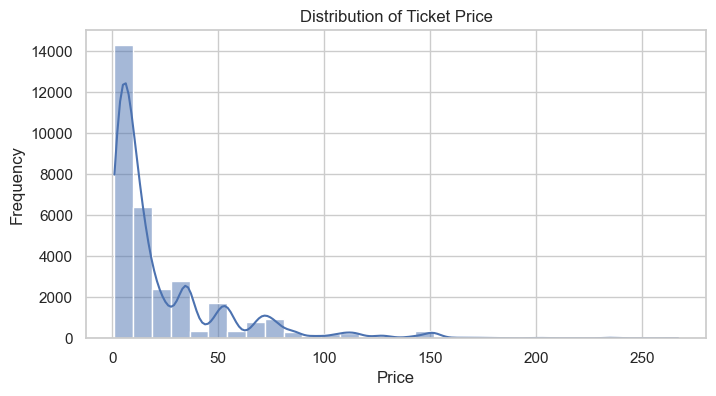

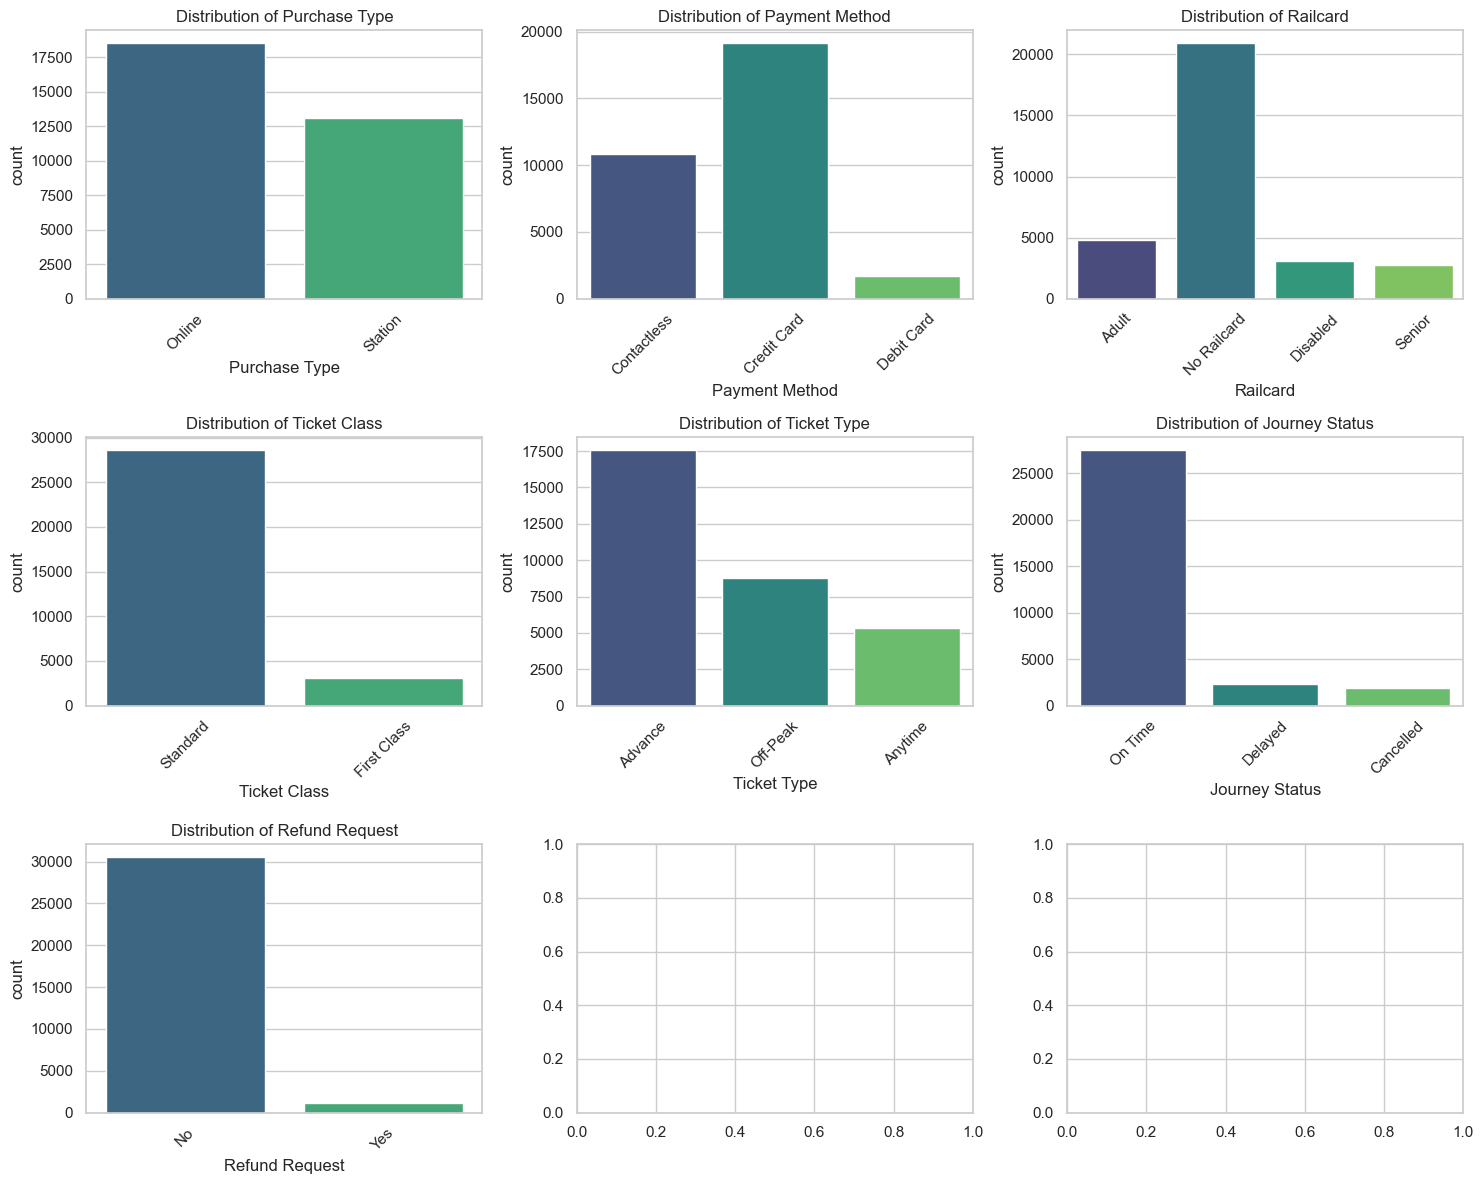

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define numerical and categorical columns
numerical_columns = ['Price']
categorical_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 
                       'Ticket Type', 'Journey Status', 'Refund Request']

# Plot numerical column distributions
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Ticket Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot categorical column distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Bivariate Analysis

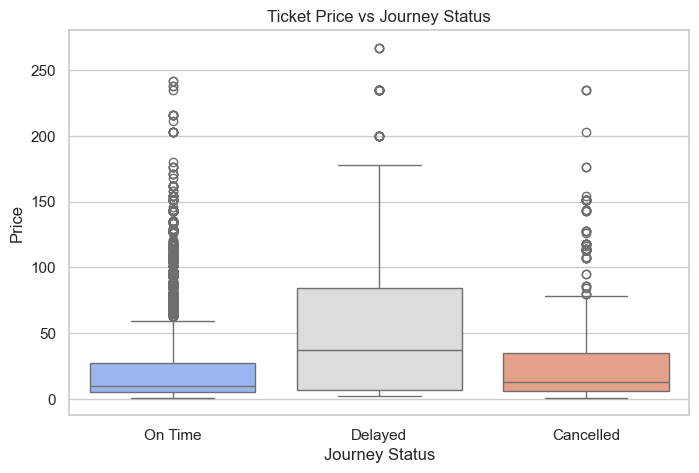

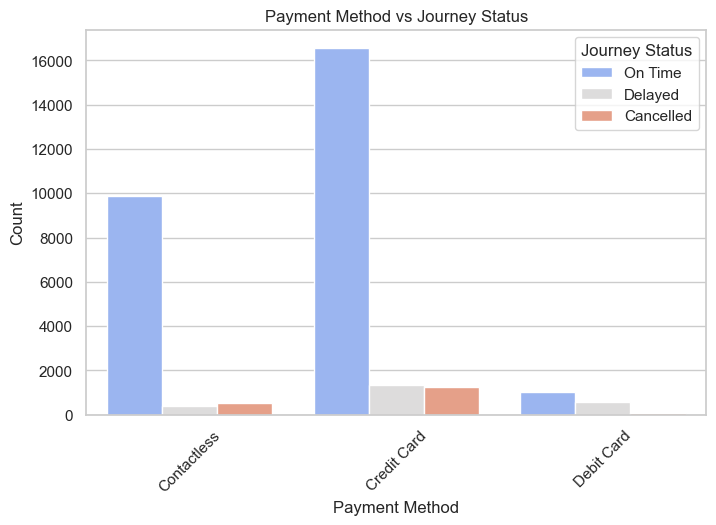

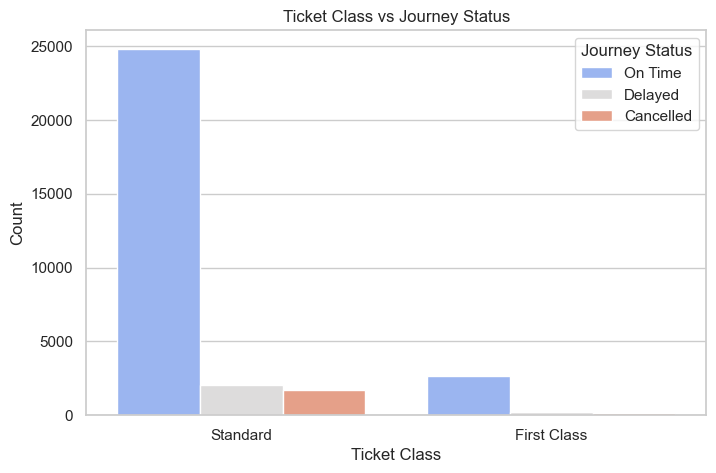

In [13]:
# Bivariate Analysis - Price vs Journey Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Journey Status"], y=df["Price"], palette="coolwarm")
plt.title("Ticket Price vs Journey Status")
plt.xlabel("Journey Status")
plt.ylabel("Price")
plt.show()

# Bivariate Analysis - Payment Method vs Journey Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Payment Method"], hue=df["Journey Status"], palette="coolwarm")
plt.title("Payment Method vs Journey Status")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis - Ticket Class vs Journey Status
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Ticket Class"], hue=df["Journey Status"], palette="coolwarm")
plt.title("Ticket Class vs Journey Status")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

##### Outlier Detection and Removel using Box plots

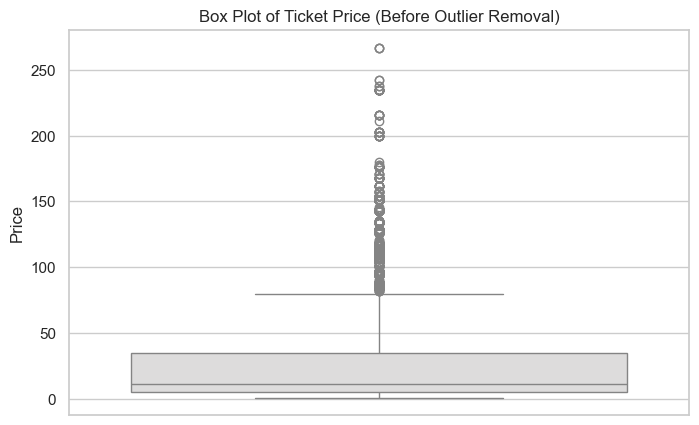

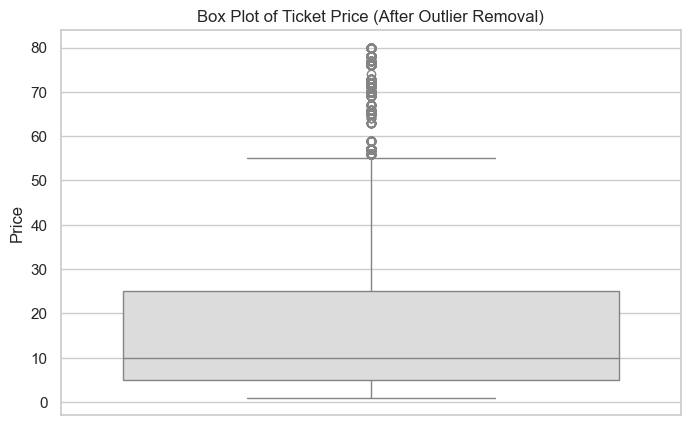

1555

In [14]:
# Box Plot before Outlier Detection
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Price"], palette="coolwarm")
plt.title("Box Plot of Ticket Price (Before Outlier Removal)")
plt.ylabel("Price")
plt.show()

# Detect Outliers using IQR
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

# Box Plot after Outlier Removal
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned["Price"], palette="coolwarm")
plt.title("Box Plot of Ticket Price (After Outlier Removal)")
plt.ylabel("Price")
plt.show()

# Display number of rows removed
outliers_removed = df.shape[0] - df_cleaned.shape[0]
outliers_removed

#### Before removal: The box plot showed extreme values in ticket prices.

#### After removal: The outliers were successfully removed, making the data distribution more reliable.

#### Total outliers removed: 1,555 rows.

### Skewness and Kurtosis Analysis:

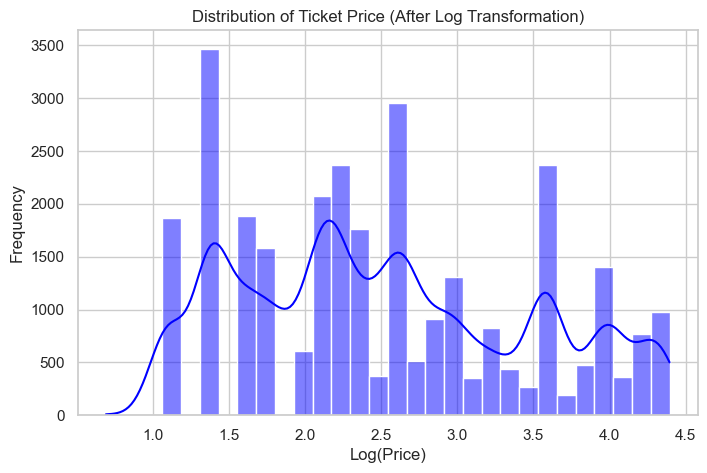

((1.5393069545166584, 1.4271654000389358),
 (0.31903375450172267, -0.9484152232194978))

In [15]:
import numpy as np

# Skewness and Kurtosis before transformation
skewness_before = df_cleaned["Price"].skew()
kurtosis_before = df_cleaned["Price"].kurtosis()

# Apply log transformation to reduce skewness
df_cleaned["Price"] = np.log1p(df_cleaned["Price"])

# Skewness and Kurtosis after transformation
skewness_after = df_cleaned["Price"].skew()
kurtosis_after = df_cleaned["Price"].kurtosis()

# Plot distribution after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Ticket Price (After Log Transformation)")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

(skewness_before, kurtosis_before), (skewness_after, kurtosis_after)

Before Transformation:

Skewness = 1.54 (right-skewed)

Kurtosis = 1.43 (peaked distribution)

After Log Transformation:

Skewness = 0.32 (closer to normal distribution)

Kurtosis = -0.95 (more balanced spread)

The transformation successfully reduced skewness.

## ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 
                       'Ticket Type', 'Departure Station', 'Arrival Destination', 
                       'Refund Request', 'Journey Status']

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Display encoded dataset sample
df_cleaned.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,0,0,0,1,0,3.784190,6,12,2024-01-01,11:00:00,13:30:00,13:30:00,2,0
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,1,1,0,1,0,3.178054,5,31,2024-01-01,09:45:00,11:35:00,11:40:00,1,0
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,0,1,2,1,0,1.386294,3,18,2024-01-02,18:15:00,18:45:00,18:45:00,2,0
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,1,1,2,1,0,2.639057,6,23,2024-01-01,21:30:00,22:30:00,22:30:00,2,0
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,0,0,2,1,0,4.343805,3,13,2024-01-01,16:45:00,19:00:00,19:00:00,2,0


### FEATURE SELECTION

In [17]:
# Drop non-relevant columns (Transaction ID, Date & Time columns)
df_selected = df_cleaned.drop(columns=[
    'Transaction ID', 'Date of Purchase', 'Time of Purchase', 
    'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time'
])

# Define target variable (Journey Status) and features
X = df_selected.drop(columns=['Journey Status'])
y = df_selected['Journey Status']

# Display final feature set
X.head()

,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Refund Request
0,0,0,0,1,0,3.784190,6,12,0
1,1,1,0,1,0,3.178054,5,31,0
2,0,1,2,1,0,1.386294,3,18,0
3,1,1,2,1,0,2.639057,6,23,0
4,0,0,2,1,0,4.343805,3,13,0


### Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 11: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 12: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((24078, 9), (6020, 9), (24078,), (6020,))

### Model Training and Evaluation

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    model_results[name] = accuracy

# Display model performance
model_results

{'Logistic Regression': 0.9134551495016612,
 'Random Forest': 0.9303986710963456,
 'Gradient Boosting': 0.9282392026578073,
 'Support Vector Machine': 0.9284053156146179,
 'K-Nearest Neighbors': 0.9167774086378737}